In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv('ipl.csv')

In [30]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [32]:
df.shape

(76014, 15)

In [33]:
# Removing unwanted columns

unwanted_columns = ['mid', 'venue', 'batsman', 'bowler', 'striker', 'non-striker']
df.drop(unwanted_columns, axis = 1, inplace = True)

In [34]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [35]:
import datetime

df['date'] = pd.to_datetime(df['date'])

In [36]:
teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
                    'Delhi Daredevils', 'Sunrisers Hyderabad']

In [37]:
df = df[(df['bat_team'].isin(teams))&(df['bowl_team'].isin(teams))]

In [38]:
df.shape

(53811, 9)

In [39]:
df = df[df['overs']>5.0]

In [40]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


In [41]:
feat_to_encode = ['bat_team','bowl_team']
df = pd.get_dummies(df, columns = feat_to_encode, drop_first=True)

In [42]:
df.tail()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,...,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
75884,2017-05-19,106,9,18.1,29,4,107,0,0,1,...,0,0,0,0,0,0,1,0,0,0
75885,2017-05-19,107,9,18.2,29,4,107,0,0,1,...,0,0,0,0,0,0,1,0,0,0
75886,2017-05-19,107,9,18.3,28,4,107,0,0,1,...,0,0,0,0,0,0,1,0,0,0
75887,2017-05-19,107,9,18.4,24,4,107,0,0,1,...,0,0,0,0,0,0,1,0,0,0
75888,2017-05-19,107,10,18.5,23,5,107,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [43]:
df.columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
       'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians',
       'bat_team_Rajasthan Royals', 'bat_team_Royal Challengers Bangalore',
       'bat_team_Sunrisers Hyderabad', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad'],
      dtype='object')

In [44]:
df = df[['total','date', 'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
       'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians',
       'bat_team_Rajasthan Royals', 'bat_team_Royal Challengers Bangalore',
       'bat_team_Sunrisers Hyderabad', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5']]

In [45]:
df.head()

,total,date,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Delhi Daredevils,...,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,runs,wickets,overs,runs_last_5,wickets_last_5
32,222,2008-04-18,0,0,1,0,0,0,0,0,...,0,0,0,1,0,61,0,5.1,59,0
33,222,2008-04-18,0,0,1,0,0,0,0,0,...,0,0,0,1,0,61,1,5.2,59,1
34,222,2008-04-18,0,0,1,0,0,0,0,0,...,0,0,0,1,0,61,1,5.3,59,1
35,222,2008-04-18,0,0,1,0,0,0,0,0,...,0,0,0,1,0,61,1,5.4,59,1
36,222,2008-04-18,0,0,1,0,0,0,0,0,...,0,0,0,1,0,61,1,5.5,58,1


In [46]:
y = df.iloc[:,0:2]

In [47]:
X = df.iloc[:,1:]

In [48]:
X_train = X[X['date'].dt.year<=2016]
X_test = X[X['date'].dt.year>=2017]

In [49]:
y_train = y[y['date'].dt.year<=2016]
y_test = y[y['date'].dt.year>=2017]

In [50]:
X_train.drop('date', axis = 1, inplace = True)
X_test.drop('date', axis = 1, inplace = True)
y_train = y_train['total']
y_test = y_test['total']

C:\Users\USER\.conda\envs\carBrandClassification\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [53]:
# Linear Regression

from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()

In [54]:
linear_model.fit(X_train,y_train)

LinearRegression()

In [58]:
linear_y_pred = linear_model.predict(X_test)
linear_y_pred

array([172.06180006, 175.20980011, 174.60646893, ..., 100.37312829,
        99.80361698,  93.14218986])

C:\Users\USER\.conda\envs\carBrandClassification\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total', ylabel='Density'>

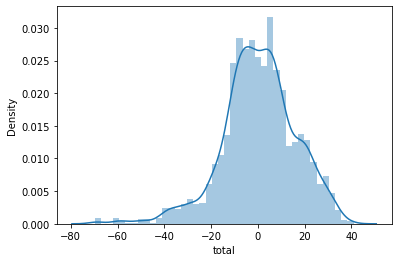

In [63]:
import seaborn as sns
sns.distplot(y_test-linear_y_pred)

In [67]:
from sklearn import metrics
MAE =  metrics.mean_absolute_error(y_test, linear_y_pred)
MSE = metrics.mean_squared_error(y_test, linear_y_pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, linear_y_pred))

In [68]:
MAE

12.118024556233069

In [69]:
MSE

251.0124165693047

In [70]:
RMSE

15.843371376361304

In [74]:
# Lasso Regression

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge_model = Ridge()

In [75]:
param={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor=GridSearchCV(ridge_model,param,scoring='neg_mean_squared_error',cv=5, verbose = 2, n_jobs = -1)
ridge_regressor.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error', verbose=2)

In [76]:
ridge_regressor.best_estimator_

Ridge(alpha=40)

In [77]:
ridge_regressor.best_params_

{'alpha': 40}

In [78]:
ridge_regressor.best_score_

-328.29207362924427

In [79]:
ridge_y_pred = ridge_regressor.predict(X_test)

C:\Users\USER\.conda\envs\carBrandClassification\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total', ylabel='Density'>

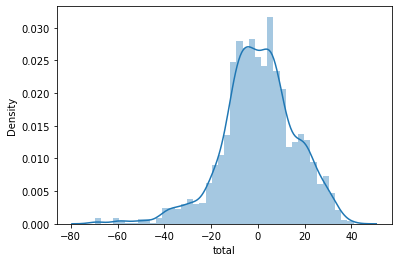

In [81]:
sns.distplot(y_test-ridge_y_pred)

In [82]:
MAE =  metrics.mean_absolute_error(y_test, ridge_y_pred)
MSE = metrics.mean_squared_error(y_test, ridge_y_pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, ridge_y_pred))

In [83]:
MAE

12.116446952346644

In [84]:
MSE

251.01528417894178

In [85]:
RMSE

15.843461874822111

In [87]:
# Lasso Regression

from sklearn.linear_model import Lasso
lasso_model = Lasso()

In [88]:
param={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor=GridSearchCV(ridge_model,param,scoring='neg_mean_squared_error',cv=5, verbose = 2, n_jobs = -1)
lasso_regressor.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error', verbose=2)

In [89]:
lasso_regressor.best_estimator_

Ridge(alpha=40)

In [90]:
lasso_regressor.best_params_

{'alpha': 40}

In [91]:
lasso_regressor.best_score_

-328.29207362924427

In [92]:
lasso_y_pred = lasso_regressor.predict(X_test)

C:\Users\USER\.conda\envs\carBrandClassification\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total', ylabel='Density'>

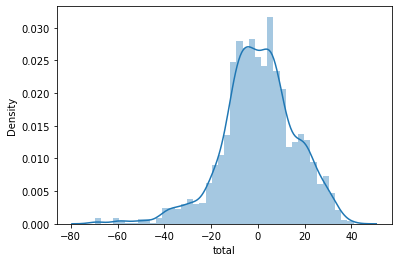

In [95]:
sns.distplot(y_test - lasso_y_pred)

In [97]:
MAE =  metrics.mean_absolute_error(y_test, lasso_y_pred)
MSE = metrics.mean_squared_error(y_test, lasso_y_pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, lasso_y_pred))

In [98]:
MAE

12.116446952346644

In [99]:
MSE

251.01528417894178

In [100]:
RMSE

15.843461874822111

In [102]:
import pickle

pickle.dump(lasso_regressor, open('lasso_first_innings.pkl', 'wb'))